#### Implementing a Sequential Model on the MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np

In [3]:
np.__version__

'1.24.0'

In [4]:
tf.__version__

'2.10.0'

In [5]:
keras.__version__

'2.10.0'

In [6]:
# load mnist
mnist = keras.datasets.mnist

In [19]:
# create training and testing data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [20]:
# create a validation set 
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
y_train[0]

7

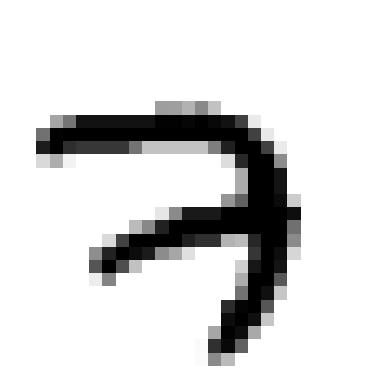

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
np.__version__

'1.24.0'

### First Sequential Model

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(30, activation = 'relu'))
model.add(keras.layers.Dense(30, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [22]:
# compile - use sparse categorical because they are not one hot encoded
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 1e-2), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs = 50, 
                    validation_data = (X_val, y_val))

Epoch 1/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8151 - accuracy: 0.7725 - val_loss: 0.3702 - val_accuracy: 0.8982
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3391 - accuracy: 0.9033 - val_loss: 0.2837 - val_accuracy: 0.9200
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.9193 - val_loss: 0.2475 - val_accuracy: 0.9284
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2459 - accuracy: 0.9290 - val_loss: 0.2192 - val_accuracy: 0.9360
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2222 - accuracy: 0.9357 - val_loss: 0.2045 - val_accuracy: 0.9414
Epoch 6/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2039 - accuracy: 0.9408 - val_loss: 0.1879 - val_accuracy: 0.9480
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1890 - accuracy: 0.9453 - val_loss: 0.1746 - val_accuracy: